# Label Distribution Analysis

In this section, we will analyze and visualize the overall distribution of labels in the dataset using bar plots.

In [3]:
import pandas as pd
import os
import sys

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Set the current working directory to the project root
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
os.chdir(ROOT_DIR)

In [5]:
df = pd.read_parquet('data/processed/phase0_baseline.parquet')

df.head()

,id,text,narratives,subnarratives,language,narrative_ids,subnarrative_ids
0,BG_670.txt,Опитът на колективния Запад да „обезкърви Руси...,[URW: Blaming the war on others rather than th...,[URW: Blaming the war on others rather than th...,BG,"[11, 12, 14]","[88, 70, 74, 86]"
1,A7_URW_BG_4793.txt,"Цончо Ганев, “Възраждане”: Обещали сме на Укра...",[URW: Discrediting Ukraine],[URW: Discrediting Ukraine: Situation in Ukrai...,BG,[13],[81]
2,BG_3245.txt,Подкрепата за Киев от страна на Запада вече не...,"[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: The We...",BG,"[13, 14]","[81, 90, 87]"
3,A9_BG_5190.txt,"Дмитрий Медведев: НПО-та, спонсорирани от Соро...","[URW: Discrediting the West, Diplomacy, URW: D...","[URW: Discrediting the West, Diplomacy: Other,...",BG,"[13, 14]","[84, 86]"
4,A9_BG_3379.txt,Британски дипломат обвини Запада за украинския...,"[URW: Discrediting the West, Diplomacy, URW: P...","[URW: Discrediting the West, Diplomacy: Other,...",BG,"[19, 14]","[86, 103]"


In [7]:
# Inspect the type and content of the first few entries in 'narratives' and 'subnarratives'
print('narratives column:')
print(df['narratives'].head())
print('Type of first entry:', type(df['narratives'].iloc[0]))
print('\nsubnarratives column:')
print(df['subnarratives'].head())
print('Type of first entry:', type(df['subnarratives'].iloc[0]))

narratives column:
0    [URW: Blaming the war on others rather than th...
1                          [URW: Discrediting Ukraine]
2    [URW: Discrediting the West, Diplomacy, URW: D...
3    [URW: Discrediting the West, Diplomacy, URW: D...
4    [URW: Discrediting the West, Diplomacy, URW: P...
Name: narratives, dtype: object
Type of first entry: <class 'numpy.ndarray'>

subnarratives column:
0    [URW: Blaming the war on others rather than th...
1    [URW: Discrediting Ukraine: Situation in Ukrai...
2    [URW: Discrediting the West, Diplomacy: The We...
3    [URW: Discrediting the West, Diplomacy: Other,...
4    [URW: Discrediting the West, Diplomacy: Other,...
Name: subnarratives, dtype: object
Type of first entry: <class 'numpy.ndarray'>


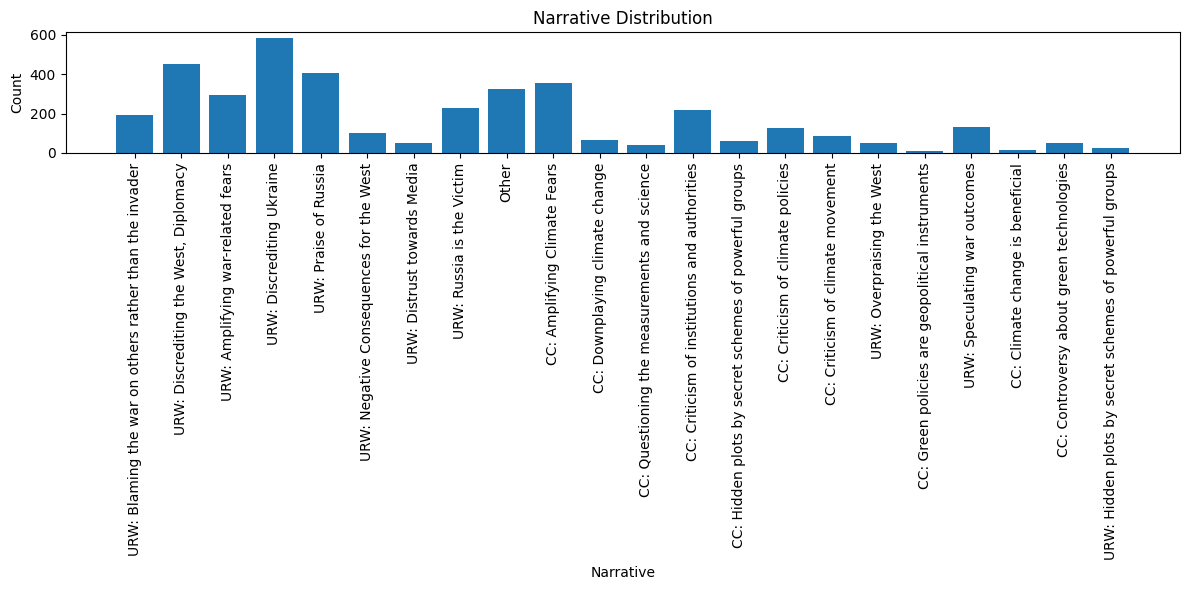

/tmp/ipykernel_102551/344610218.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


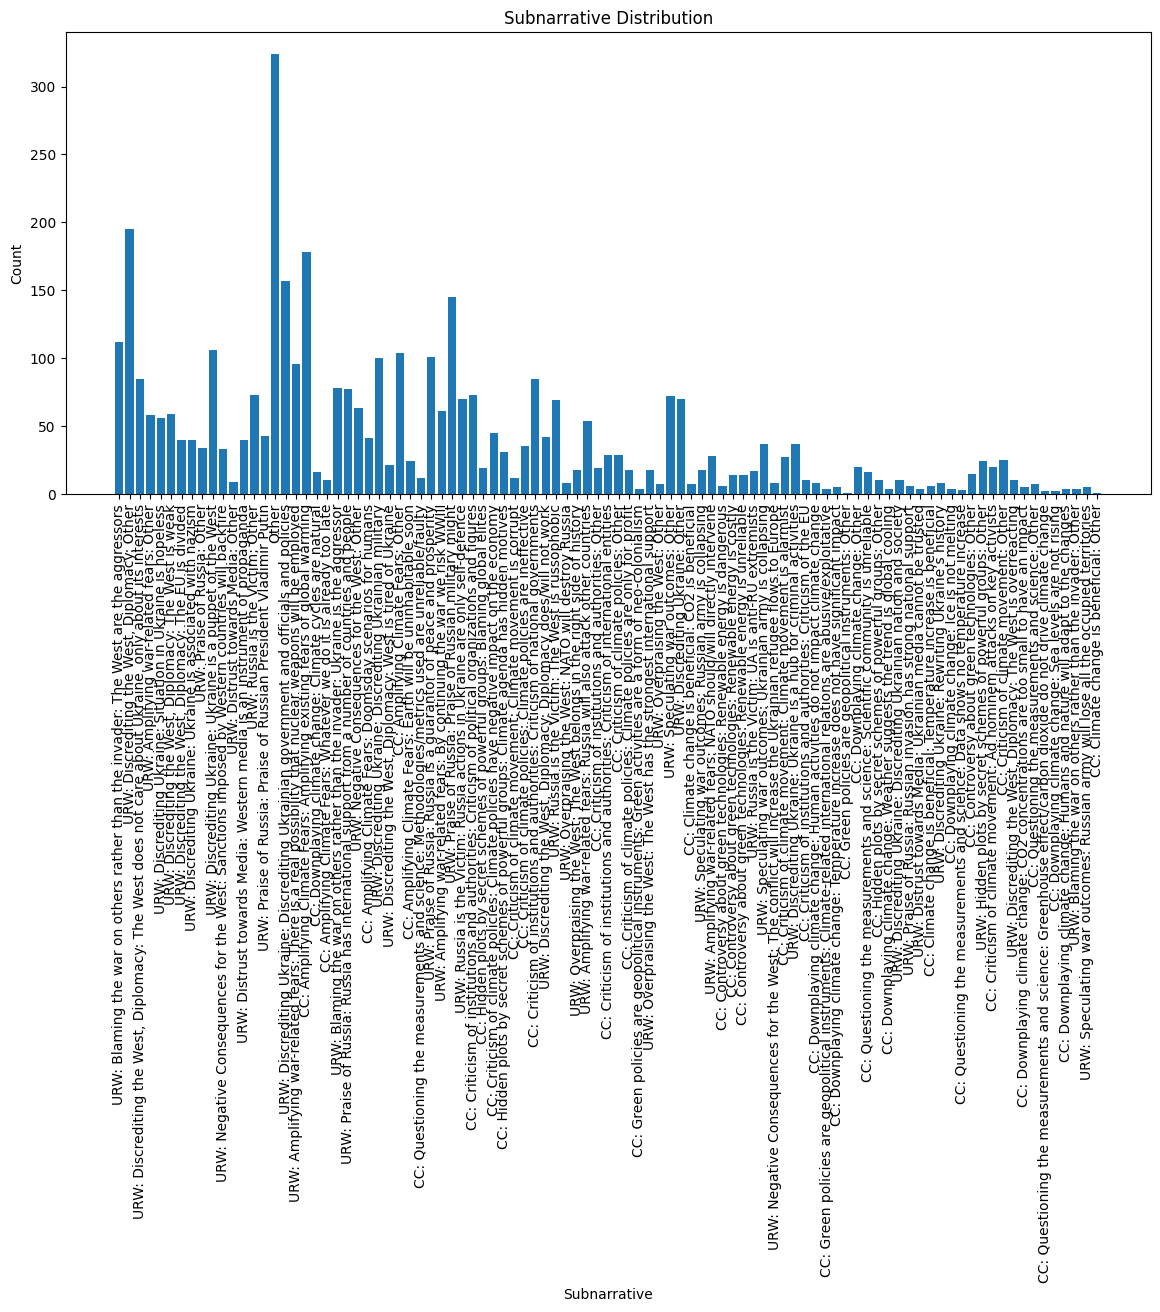

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten and count narratives
narratives_flat = [narr for sublist in df['narratives'] for narr in (sublist.tolist() if hasattr(sublist, 'tolist') else list(sublist))]
narrative_counts = Counter(narratives_flat)

plt.figure(figsize=(12, 6))
plt.bar(list(narrative_counts.keys()), list(narrative_counts.values()))
plt.xticks(rotation=90)
plt.title('Narrative Distribution')
plt.xlabel('Narrative')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Flatten and count subnarratives
subnarratives_flat = [subnarr for sublist in df['subnarratives'] for subnarr in (sublist.tolist() if hasattr(sublist, 'tolist') else list(sublist))]
subnarrative_counts = Counter(subnarratives_flat)

plt.figure(figsize=(14, 6))
plt.bar(list(subnarrative_counts.keys()), list(subnarrative_counts.values()))
plt.xticks(rotation=90)
plt.title('Subnarrative Distribution')
plt.xlabel('Subnarrative')
plt.ylabel('Count')
plt.tight_layout()
plt.show()